# Leitura e visualização do ERA5

## Importar bibliotecas **`xarray`**

In [1]:
import xarray as xr

## Ler dados

In [2]:
ds = xr.open_dataset('/home/christian/PDD_model_chris/data/static/BG_static_250m.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lon: 34, lat: 18)
Coordinates:
  * lon      (lon) float64 -58.93 -58.93 -58.92 -58.92 ... -58.85 -58.85 -58.85
  * lat      (lat) float64 -62.19 -62.18 -62.18 -62.18 ... -62.15 -62.15 -62.14
Data variables:
    HGT      (lat, lon) float32 ...
    ASPECT   (lat, lon) float32 ...
    SLOPE    (lat, lon) float32 ...
    MASK     (lat, lon) float32 ...

Usando **`xarray`**, podemos visualizar nossos dados de forma mais estruturada. Vamos dar uma olhada na estrutura dos nossos dados. Ela é composta de coordenadas, variáveis e atributos.

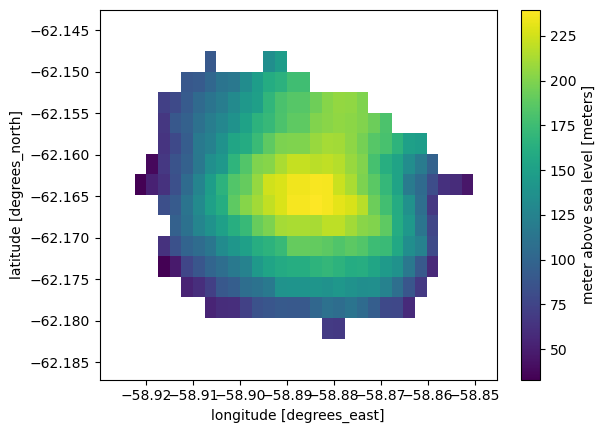

In [7]:
ds.HGT.where(ds.MASK==1).plot()

Agora vamos criar uma figura usando a função **`plot`** dentro de **`xarray`**.

### Vamos importar algumas funções do **`cartopy`**.

In [6]:
from cartopy.io.shapereader import Reader as ShapeReader
from cartopy.crs import PlateCarree

Definiremos uma projeção para uso posterior.

In [7]:
projection = PlateCarree()

###  Importamos o **`numpy`** para fazer algumas operações

In [8]:
import numpy as np

Por exemplo, convertemos a temperatura de **°K** para **°C**. Além disso, criamos latitude e longitude como matrizes. 

In [9]:
T = ds['t2m'][0]-273.16
U = ds['u10'][0]
V = ds['v10'][0]

lat = ds['latitude']
lon = ds['longitude']
lon, lat = np.meshgrid(lon, lat)


In [10]:
lon

array([[-85.  , -84.75, -84.5 , ..., -35.5 , -35.25, -35.  ],
       [-85.  , -84.75, -84.5 , ..., -35.5 , -35.25, -35.  ],
       [-85.  , -84.75, -84.5 , ..., -35.5 , -35.25, -35.  ],
       ...,
       [-85.  , -84.75, -84.5 , ..., -35.5 , -35.25, -35.  ],
       [-85.  , -84.75, -84.5 , ..., -35.5 , -35.25, -35.  ],
       [-85.  , -84.75, -84.5 , ..., -35.5 , -35.25, -35.  ]],
      dtype=float32)

In [11]:
lat

array([[-50.  , -50.  , -50.  , ..., -50.  , -50.  , -50.  ],
       [-50.25, -50.25, -50.25, ..., -50.25, -50.25, -50.25],
       [-50.5 , -50.5 , -50.5 , ..., -50.5 , -50.5 , -50.5 ],
       ...,
       [-74.5 , -74.5 , -74.5 , ..., -74.5 , -74.5 , -74.5 ],
       [-74.75, -74.75, -74.75, ..., -74.75, -74.75, -74.75],
       [-75.  , -75.  , -75.  , ..., -75.  , -75.  , -75.  ]],
      dtype=float32)

In [12]:
print('Latitudes')
print(lat.min())
print(lat.max())
print('Longitudes')
print(lon.min())
print(lon.max())



Latitudes
-75.0
-50.0
Longitudes
-85.0
-35.0


### Importamos **`matplotlib`**.

In [13]:
from matplotlib import pyplot as plt

Podemos ver os valores mínimo e máximo da temperatura.

In [14]:
print(T.values.min())
print(T.values.max())

-32.828598
10.751709


### Importamos **`cmaps`** e **`geocat.viz`**.

In [15]:
import cmaps
import geocat.viz as gv

In [16]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

In [17]:
# Definir níveis de contorno
clevs = np.linspace(T.values.min()-0.5, T.values.max()+0.5, 12, dtype=float).round() # Vector

print(clevs)

[-33. -29. -25. -21. -17. -13.  -9.  -5.  -1.   3.   7.  11.]


In [18]:
# Importação do mapa de cores básico para trabalhar
newcmp = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                              minval=0.1,
                              maxval=0.6,
                              n=len(clevs))


### Agora vamos criar nossa figura

### Adicionamos a temperatura

In [19]:
import cartopy.feature as cf

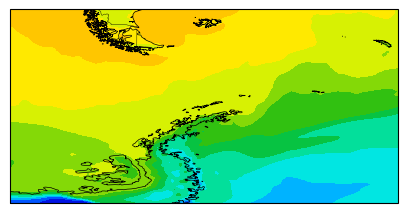

In [20]:
# Gerar uma figura (definir seu tamanho (largura, altura) em polegadas) e eixos usando o Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aqui definimos os limites de nossa figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos adicionar uma informação vetorial como um shapefile ou usar os shp do cartopy
#fname = '../data/shapefiles/vc965bq8111.shp'
#ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)
ax.add_feature(cf.COASTLINE.with_scale("10m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("10m"), lw=0.3)

# Agora adicionamos o campo de temperatura
cfp = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

### Agora vamos adicionar a paleta de cores

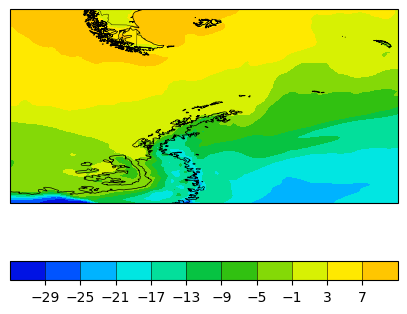

In [21]:
# Gerar uma figura (definir seu tamanho (largura, altura) em polegadas) e eixos usando o Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aqui definimos os limites de nossa figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos adicionar uma informação vetorial como um shapefile ou usar os shp do cartopy 
#fname = '../data/shapefiles/vc965bq8111.shp'
#ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)

ax.add_feature(cf.COASTLINE.with_scale("10m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("10m"), lw=0.3)

# Agora adicionamos o campo de temperatura
cfp = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical e horizontal  
cbar = plt.colorbar(cfp,
                    ax=ax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')


### Desenho de vetores de vento

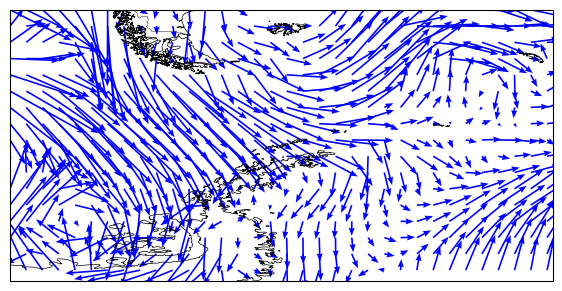

In [22]:
# Gerar uma figura (definir seu tamanho (largura, altura) em polegadas) e eixos usando o Cartopy
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

ax.add_feature(cf.COASTLINE.with_scale("10m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("10m"), lw=0.3)

# Adicionamos vetores de vento com `quiver`.

dim_grid = 6
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='blue',
              width=.003, ## largura
              scale=120.,  ## Comprimento
              headwidth=3.75, ## largura da cabeça
              )


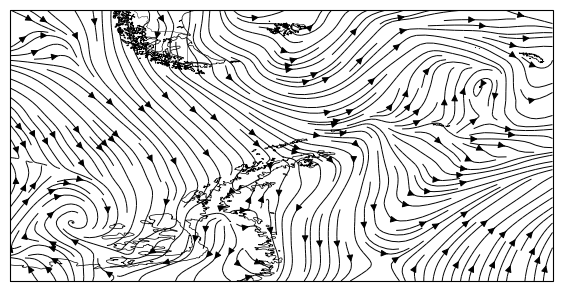

In [23]:
# Gerar uma figura (definir seu tamanho (largura, altura) em polegadas) e eixos usando o Cartopy
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

ax.add_feature(cf.COASTLINE.with_scale("10m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("10m"), lw=0.3)

# Agregamos os vetores de vento com o `streamplot`.

ax.streamplot(U.longitude, U.latitude, U.values, V.values, transform=projection, density=2, 
              color='k', linewidth=0.7)


### Modificamos a barra de cores e o rótulos

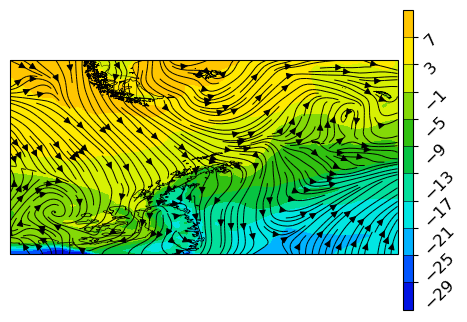

In [24]:
# Gerar uma figura (definir seu tamanho (largura, altura) em polegadas) e eixos usando o Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

#fname = '../data/shapefiles/vc965bq8111.shp'
#ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)
ax.add_feature(cf.COASTLINE.with_scale("10m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("10m"), lw=0.3)

cfp = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical e horizontal  

## Posição x e y; largura e altura
cax = plt.axes((0.91, 0.190, 0.02, 0.60))

cbar = plt.colorbar(cfp,
                    ax=ax,
                    cax=cax, # configurar la bara de color
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='vertical')

## Configurar os rótulos
cbar.ax.tick_params(labelsize=12, rotation=45)

# Agregamos os vetores de vento com o `streamplot`.

ax.streamplot(U.longitude, U.latitude, U.values, V.values, transform=projection, density=2, color='k', linewidth=0.7)


### Agora adicionamos os rótulos lat e lon. Também salvamos nossa figura.

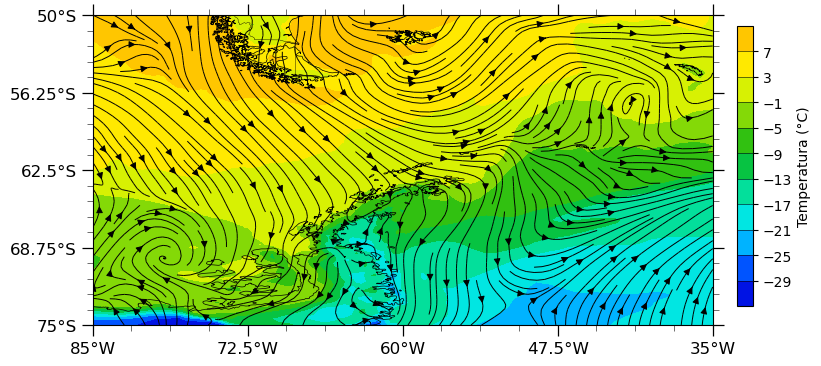

In [25]:
# Gerar uma figura (definir seu tamanho (largura, altura) em polegadas) e eixos usando o Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

#fname = '../data/shapefiles/vc965bq8111.shp'
#ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)
ax.add_feature(cf.COASTLINE.with_scale("10m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("10m"), lw=0.3)

cfp = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
## posicion x e y; ancho y alto
cax = plt.axes((0.93, 0.325, 0.02, 0.35))
cbar = plt.colorbar(cfp,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='vertical',
                    label='Temperatura (°C)')
#cbar.ax.tick_params(labelsize=12, rotation=45)


# Adicionamos vetores de vento com streamplot

ax.streamplot(U.longitude, U.latitude, U.values, V.values, transform=projection, density=2, color='k', linewidth=0.7)


# definimos as características dos "ticks".
gv.set_axes_limits_and_ticks(ax,
                             xticks=np.linspace(lon.min(), lon.max(), 5),
                             yticks=np.linspace(lat.min(), lat.max(), 5))

# Adição das latitudes e longitudes correspondentes
gv.add_lat_lon_ticklabels(ax)

# configuração de ticks maiores e menores
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=5,
                         labelsize=12)

# Salvar uma figura
fig.savefig('fig/Temp_202101.png', dpi = 300, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)

## Cortar o conjunto de dados para uma região específica

### Norte da Península Antártica

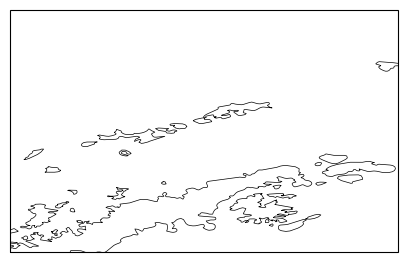

In [26]:
# Gerar uma figura (definir seu tamanho (largura, altura) em polegadas) e eixos usando o Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aqui definimos os limites de lon e lat de nossa figura.
ax.set_extent([-63, -55, -65, -60], crs=projection)

ax.add_feature(cf.COASTLINE.with_scale("10m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("10m"), lw=0.3)


### Usamos **`xarray.Dataset.sel`** para dividir o conjunto de dados.

In [27]:
help(xr.Dataset.sel)

Help on function sel in module xarray.core.dataset:

sel(self, indexers: Mapping[Any, Any] = None, method: str = None, tolerance: numbers.Number = None, drop: bool = False, **indexers_kwargs: Any) -> 'Dataset'
    Returns a new dataset with each array indexed by tick labels
    along the specified dimension(s).
    
    In contrast to `Dataset.isel`, indexers for this method should use
    labels instead of integers.
    
    Under the hood, this method is powered by using pandas's powerful Index
    objects. This makes label based indexing essentially just as fast as
    using integer indexing.
    
    It also means this method uses pandas's (well documented) logic for
    indexing. This means you can use string shortcuts for datetime indexes
    (e.g., '2000-01' to select all values in January 2000). It also means
    that slices are treated as inclusive of both the start and stop values,
    unlike normal Python indexing.
    
    Parameters
    ----------
    indexers : dict, opti

In [28]:
ds_crop = ds.sel(longitude=slice(-63, -55), latitude=slice(-60, -65))
ds_crop

<xarray.Dataset>
Dimensions:    (longitude: 33, latitude: 21, time: 4)
Coordinates:
  * longitude  (longitude) float32 -63.0 -62.75 -62.5 ... -55.5 -55.25 -55.0
  * latitude   (latitude) float32 -60.0 -60.25 -60.5 ... -64.5 -64.75 -65.0
  * time       (time) datetime64[ns] 2020-06-01 ... 2020-06-01T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 8.171 8.171 ... 3.025 3.376
    v10        (time, latitude, longitude) float32 -6.082 -5.918 ... -1.926
    t2m        (time, latitude, longitude) float32 275.7 275.7 ... 266.3 265.6
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-15 19:09:30 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

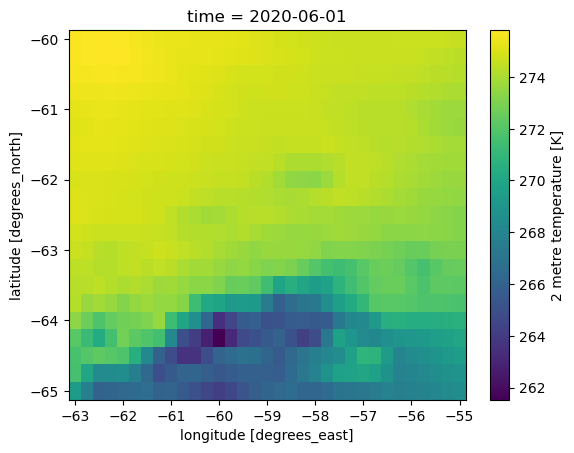

In [29]:
ds_crop.t2m[0].plot()

In [30]:
T_crop = ds_crop['t2m'][0]-273.16
U_crop = ds_crop['u10'][0]
V_crop = ds_crop['v10'][0]

lat_crop = ds_crop['latitude']
lon_crop = ds_crop['longitude']
lon_crop, lat_crop = np.meshgrid(lon_crop, lat_crop)


In [31]:
# Definir níveis de contorno
clevs_crop = np.linspace(T_crop.values.min()-0.5, T_crop.values.max()+0.5, 12, dtype=float).round() # Vector

# Importação do mapa de cores básico para trabalhar com
newcmp_crop = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                              minval=0.1,
                              maxval=0.6,
                              n=len(clevs_crop))

/home/christian/miniconda3/envs/geocat/lib/python3.9/site-packages/geocat/viz/util.py:550: UserWarning: Trying to register the cmap 'trunc(BkBlAqGrYeOrReViWh200,0.10,0.60)' which already exists.
  cm.register_cmap(name, new_cmap)


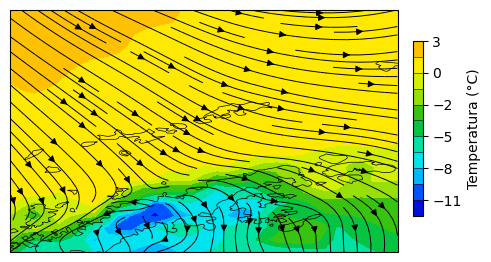

In [32]:
# Gerar uma figura (definir seu tamanho (largura, altura) em polegadas) e eixos usando o Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aqui definimos os limites de lon e lat de nossa figura.
ax.set_extent([-63, -55, -65, -60], crs=projection)

# Podemos adicionar informações vetoriais como um shapefile usando 'add_feature'.
ax.add_feature(cf.COASTLINE.with_scale("10m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("10m"), lw=0.3)

# Agora adicionamos o campo de temperatura
cfp = ax.contourf(lon_crop,lat_crop, T_crop.values, levels=clevs_crop, cmap=newcmp_crop, zorder=1)

cax = plt.axes((0.93, 0.325, 0.02, 0.35))
cbar = plt.colorbar(cfp,
                    ax=ax,
                    cax=cax,
                    #ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='vertical',
                    label='Temperatura (°C)')

ax.streamplot(U_crop.longitude, U_crop.latitude, U_crop.values, V_crop.values, transform=projection, density=1, color='k', linewidth=0.7)
